In [1]:
# Import pandas 
import pandas as pd
import numpy as np
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\fifa19.csv"
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [2]:
df1.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
del df1['Unnamed: 0']
df1.set_index('ID', inplace=True)

In [4]:
#Dealing with Nan
df1.shape
df1.dropna(subset=['Jersey Number'],inplace=True)

In [5]:
df1.isna()
df1.columns

Index(['Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential',
       'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       

In [6]:
df1.iloc[1].tail(30)
#df1['Body Type'].unique()

Dribbling            88.0
Curve                81.0
FKAccuracy           76.0
LongPassing          77.0
BallControl          94.0
Acceleration         89.0
SprintSpeed          91.0
Agility              87.0
Reactions            96.0
Balance              70.0
ShotPower            95.0
Jumping              95.0
Stamina              88.0
Strength             79.0
LongShots            93.0
Aggression           63.0
Interceptions        29.0
Positioning          95.0
Vision               82.0
Penalties            85.0
Composure            95.0
Marking              28.0
StandingTackle       31.0
SlidingTackle        23.0
GKDiving              7.0
GKHandling           11.0
GKKicking            15.0
GKPositioning        14.0
GKReflexes           11.0
Release Clause    €127.1M
Name: 20801, dtype: object

In [7]:
#Subset
subs=['LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']
df2=df1[['Name','Age','Overall','Value','Position']+subs].dropna()
df2[subs]=df2[subs].applymap(eval)
trainX=df2[subs]

In [8]:
df2.head()


,Name,Age,Overall,Value,Position,LS,ST,RS,LW,LF,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,94,€110.5M,RF,90,90,90,94,95,...,66,63,63,63,66,61,49,49,49,61
20801,Cristiano Ronaldo,33,94,€77M,ST,94,94,94,92,93,...,68,64,64,64,68,64,56,56,56,64
190871,Neymar Jr,26,92,€118.5M,LW,87,87,87,92,92,...,68,63,63,63,68,63,50,50,50,63
192985,K. De Bruyne,27,91,€102M,RCM,85,85,85,90,90,...,80,80,80,80,80,76,69,69,69,76
183277,E. Hazard,27,91,€93M,LF,86,86,86,92,91,...,69,66,66,66,69,63,52,52,52,63


In [9]:
df1['Position'].values

array(['RF', 'ST', 'LW', ..., 'ST', 'RW', 'CM'], dtype=object)

In [10]:
numeric = df1.select_dtypes(['int','float'])
df1.dtypes
numeric.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18147 entries, 158023 to 246269
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18147 non-null  int64  
 1   Overall                   18147 non-null  int64  
 2   Potential                 18147 non-null  int64  
 3   Special                   18147 non-null  int64  
 4   International Reputation  18147 non-null  float64
 5   Weak Foot                 18147 non-null  float64
 6   Skill Moves               18147 non-null  float64
 7   Jersey Number             18147 non-null  float64
 8   Crossing                  18147 non-null  float64
 9   Finishing                 18147 non-null  float64
 10  HeadingAccuracy           18147 non-null  float64
 11  ShortPassing              18147 non-null  float64
 12  Volleys                   18147 non-null  float64
 13  Dribbling                 18147 non-null  float64
 14  Curve

In [11]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=5)

# Fit model to points
model.fit(numeric)

# Determine the cluster labels of new_points: labels
#labels = model.predict(new_points)

# Print cluster labels of new_points
#print(labels)

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\U

KMeans(n_clusters=5)

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\krawc\OneDrive\Documents\code\pyth

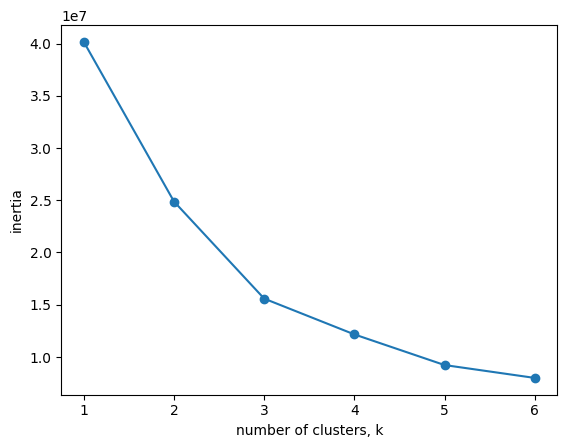

In [12]:
import matplotlib.pyplot as plt
#ELBOW plot
ks = range(1, 7)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(trainX)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [13]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=5)

# Use fit_predict to fit model and obtain cluster labels: labels
    # tu wrzucamy array danych bez nazw kolumn ani wierszy
labels = model.fit_predict(trainX)
    #to wypluwa dla kazdego wiersza w arrayu jakis prediction

# Create a DataFrame with labels and varieties as columns: df
    #tu poprostu przylaczamy jakies dane z pierwotnej tabeli do predictions - musza miec tyle samo wierszy
df = pd.DataFrame({'labels': labels, 'position': df2['Position'].values, 'name': df2['Name'].values})

# Create crosstab: ct
ct = pd.crosstab(df['labels'] , df['position'])

# Display ct
print(ct)


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


position  CAM    CB  CDM  CF   CM  LAM   LB  LCB  LCM  LDM  ...   RB  RCB  \
labels                                                      ...             
0         144    75  294   6  411    1  358   58  197  118  ...  356   55   
1          60   529  543   0  592    0  718  302  117  106  ...  699  293   
2         487     0    3  34  129   19    3    0   65    9  ...    2    1   
3         263     2    1  34  167    1    6    0   10    2  ...    3    0   
4           4  1172  107   0   95    0  237  288    6    8  ...  231  313   

position  RCM  RDM  RF   RM   RS   RW  RWB    ST  
labels                                            
0         204  128   2  144    8   21   20    33  
1         129  105   0   95    2   11   52    17  
2          42   12  14  516  125  204    0   832  
3          11    1   0  357   68  134    1  1270  
4           5    2   0   12    0    0   14     0  

[5 rows x 26 columns]


In [14]:
df[df.labels==1]

,labels,position,name
19,1,LCB,G. Chiellini
36,1,LCB,K. Koulibaly
77,1,LCB,K. Manolas
99,1,RCB,J. Giménez
103,1,CB,N. Süle
...,...,...,...
15370,1,CDM,A. Splaine
15374,1,CM,R. Deiman
15378,1,CM,Zhao Yingjie
15393,1,CM,J. Tromsdal


In [15]:
#hierarchical-clustering
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(trainX, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=df2['Name'].values,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [ ]:
df3=df1[['Name','Value','Nationality','Overall','Club','Dribbling','BallControl','Strength','Aggression']]

df4=pd.crosstab(df3.Club,df3.Nationality)


Index([' SSV Jahn Regensburg', '1. FC Heidenheim 1846', '1. FC Kaiserslautern',
       '1. FC Köln', '1. FC Magdeburg', '1. FC Nürnberg', '1. FC Union Berlin',
       '1. FSV Mainz 05', 'AC Ajaccio', 'AC Horsens',
       ...
       'Wycombe Wanderers', 'Yeni Malatyaspor', 'Yeovil Town',
       'Yokohama F. Marinos', 'Zagłębie Lubin', 'Zagłębie Sosnowiec',
       'Çaykur Rizespor', 'Örebro SK', 'Östersunds FK', 'Śląsk Wrocław'],
      dtype='object', name='Club', length=651)

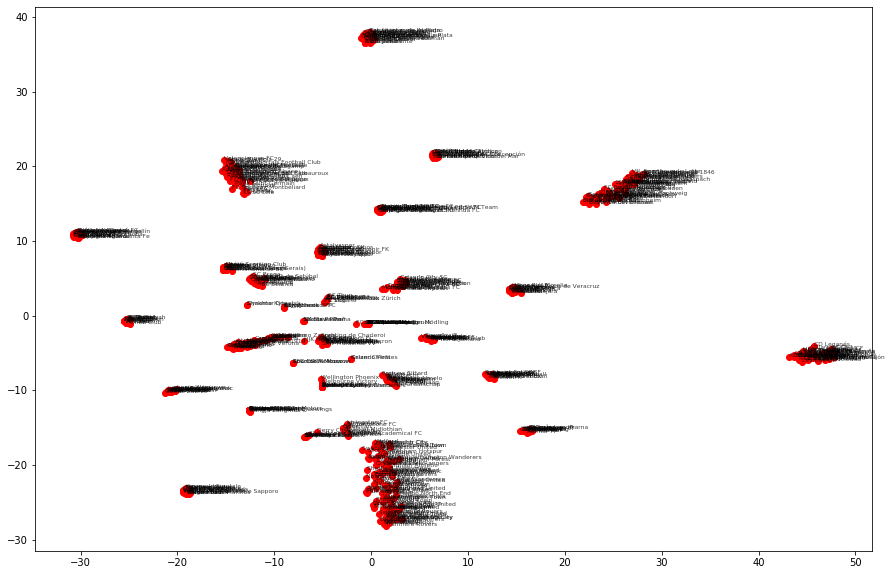

In [ ]:
fig = plt.figure(figsize=(15,10))
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df4.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c='red')

# Annotate the points
for x, y, ctry in zip(xs, ys, df4.index):
    plt.annotate(ctry, (x, y), fontsize=10, alpha=0.75)
plt.show()

In [ ]:
df5=df3.iloc[:500,:].groupby('Club').mean()

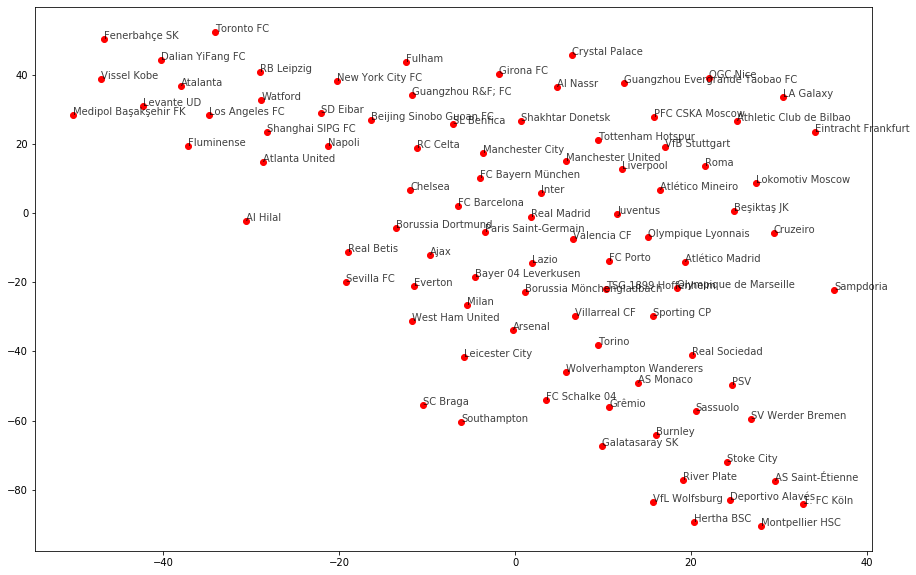

In [ ]:
fig = plt.figure(figsize=(15,10))
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df5.values)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c='red')

# Annotate the points
for x, y, ctry in zip(xs, ys, df5.index):
    plt.annotate(ctry, (x, y), fontsize=10, alpha=0.75)
plt.show()